## Automatic Topic Labeling with Wordnet English editorial articles

In [1]:
import sys
sys.path.append("../..")
from src.Automati_Topic_Labeling_Wordnet.extrinsic_topic_labler import ExtrensicTopicLabeler
from src.Automati_Topic_Labeling_Wordnet.wordnet_embeddings import Wordnet
from src.Automati_Topic_Labeling_Wordnet.polyglot_embeddings import get_topic_labels as pl
from src.models import topic_models as tm
from src.Automati_Topic_Labeling_Wordnet.topic_embedding import words_for_topics as wt
from src.visualization import label_count as lc

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
tm = tm.TopicModel.load("topic_models/lda/ENED_lda_english_editorial_articles_130.pkl")
topics = tm.get_topics()
topics_df = tm.get_topics_dataframe()

In [3]:
new_topics = wt(topics,3)

### Choose lables with Scoringfunction over Hypernyms

In [4]:
e = ExtrensicTopicLabeler()
labels = e.get_topic_labels(topics, values=False)
labels_preprocessed = e.get_topic_labels(new_topics, values=False)

In [5]:
### take only the best label
llist = []
for ll in labels: 
    try:
      llist.append(ll[0])
    except IndexError:
        llist.append([])
llpre = [] 
for ll in labels_preprocessed: 
    try:
      llpre.append(ll[0])
    except IndexError:
        llpre.append([])

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [7]:
combined_df = e.combine_topic_and_labels(topics_df, llist)
combined_df['preprocessed_labels'] = llpre
display(combined_df)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,consumer,consumer
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,executive_department,creator
Topic 2,book,people,life,come,community,generation,movement,new,know,write,group,experience
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,microorganism,food
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,letter,material
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,happening,microorganism
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,give,get
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,illness,size
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,user,add
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,promotion,promotion


In [8]:
search_dict =["entity","physical_entity","object","whole","matter","abstraction"]

In [9]:
l = lc.wordcount_scor(combined_df,"labels")
pre_l = lc.wordcount_scor(combined_df,"preprocessed_labels")

In [10]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[]
[]


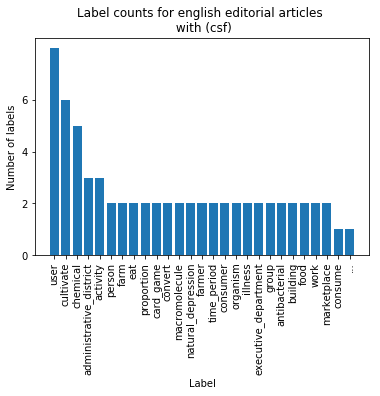

In [11]:
lc.plot_label_counts(combined_df, "labels","with scoring",lc.wordcount_scor,"english editorial articles \n with (csf)", sort=True, cut_ones=True)

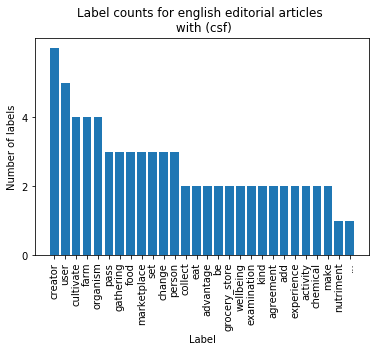

In [12]:
lc.plot_label_counts(combined_df, "preprocessed_labels","with scoring_pre",lc.wordcount_scor,"english editorial articles \n with (csf)", sort=True, cut_ones = True)

### Lowest common Hypernym with Similarityfunction

In [13]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"path_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"path_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[entity],[whole]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[entity],[entity]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[group],[abstraction]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[physical_entity],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[abstraction],[stroke]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[entity],[entity]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[entity],[event]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[whole],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[abstraction],[abstraction]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[abstraction],[ad]


In [14]:
l = lc.wordcount(combined_dfwb,"labels")
pre_l = lc.wordcount(combined_dfwb,"preprocessed_labels")

In [15]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('entity', 19), ('physical_entity', 20), ('object', 7), ('whole', 4), ('matter', 1), ('abstraction', 33)]
[('entity', 7), ('physical_entity', 7), ('object', 5), ('whole', 2), ('matter', 1), ('abstraction', 16)]


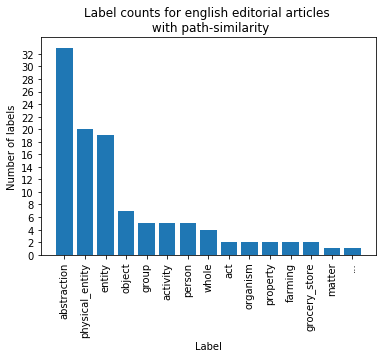

In [16]:
lc.plot_label_counts(combined_dfwb, "labels","pathsim",lc.wordcount,"english editorial articles \n with path-similarity", sort=True, cut_ones =True)

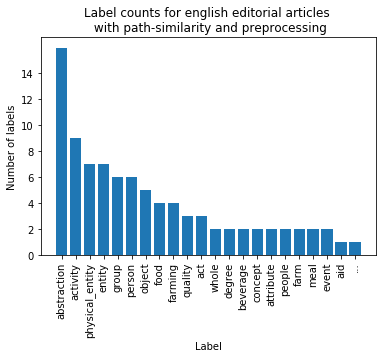

In [17]:
lc.plot_label_counts(combined_dfwb, "preprocessed_labels","pathsim_pre",lc.wordcount,"english editorial articles \n with path-similarity and preprocessing", sort=True,cut_ones =True)

In [44]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"lch_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"lch_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[entity],[whole]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[entity],[entity]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[abstraction],[abstraction]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[physical_entity],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[abstraction],[stroke]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[entity],[entity]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[entity],[event]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[whole],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[abstraction],[abstraction]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[abstraction],[abstraction]


In [45]:
l = lc.wordcount(combined_dfwb,"labels")
pre_l = lc.wordcount(combined_dfwb,"preprocessed_labels")

In [46]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('entity', 29), ('physical_entity', 23), ('object', 7), ('whole', 4), ('matter', 1), ('abstraction', 42)]
[('entity', 13), ('physical_entity', 12), ('object', 9), ('whole', 3), ('matter', 1), ('abstraction', 25)]


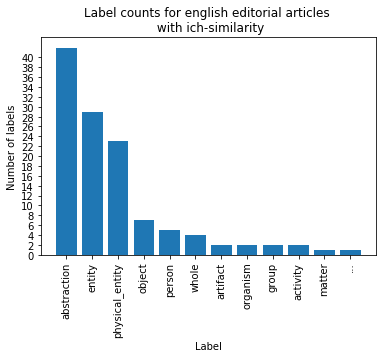

In [47]:
lc.plot_label_counts(combined_dfwb, "labels","ichsim",lc.wordcount,"english editorial articles \n with ich-similarity", sort=True,cut_ones = True)

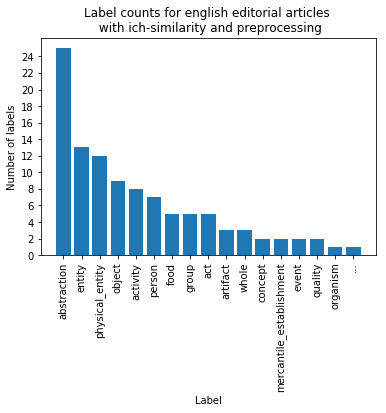

In [22]:
lc.plot_label_counts(combined_dfwb, "preprocessed_labels","ichsim_pre",lc.wordcount,"english editorial articles \n with ich-similarity and preprocessing", sort=True,cut_ones = True)

In [23]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"res_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"res_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[person],[mercantile_establishment]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[Department_of_Agriculture],[social_group]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[group],[cognition]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[organism],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[stroke],[stroke]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[enteric_bacteria],[bacteria]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[quality],[event]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[whole],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[force],[administrative_unit]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[act],[ad]


In [24]:
l = lc.wordcount(combined_dfwb,"labels")
pre_l = lc.wordcount(combined_dfwb,"preprocessed_labels")

In [25]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('physical_entity', 4), ('object', 5), ('whole', 4), ('matter', 9), ('abstraction', 5)]
[('physical_entity', 2), ('object', 4), ('whole', 1), ('matter', 2), ('abstraction', 1)]


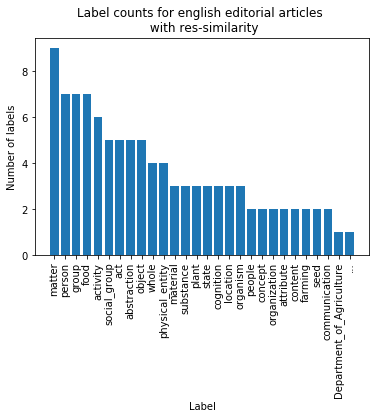

In [26]:
lc.plot_label_counts(combined_dfwb, "labels","ressim",lc.wordcount,"english editorial articles \n with res-similarity", sort=True,cut_ones = True)

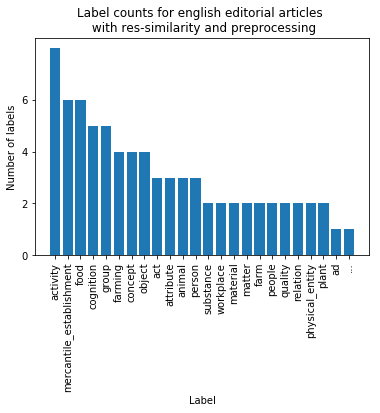

In [27]:
lc.plot_label_counts(combined_dfwb, "preprocessed_labels","ressim_pre",lc.wordcount,"english editorial articles \n with res-similarity and preprocessing", sort=True,cut_ones = True)

In [48]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"jcn_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"jcn_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[delivery],[mercantile_establishment]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[Department_of_Agriculture],[entity]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[group],[abstraction]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[physical_entity],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[abstraction],[stroke]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[condom],[entity]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[abstraction],[event]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[entity],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[abstraction],[administrative_unit]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[ad],[ad]


In [49]:
l = lc.wordcount(combined_dfwb,"labels")
pre_l = lc.wordcount(combined_dfwb,"preprocessed_labels")

In [50]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('entity', 19), ('physical_entity', 14), ('object', 3), ('whole', 2), ('matter', 1), ('abstraction', 25)]
[('entity', 10), ('physical_entity', 6), ('object', 2), ('whole', 2), ('matter', 2), ('abstraction', 9)]


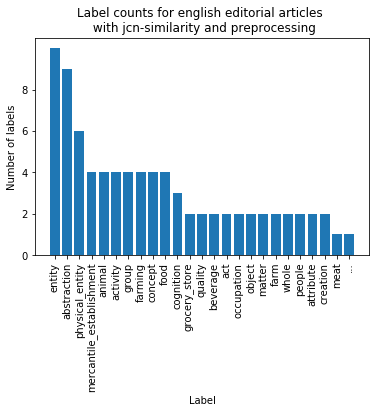

In [31]:
lc.plot_label_counts(combined_dfwb, "preprocessed_labels","jcnsim_pre",lc.wordcount,"english editorial articles \n with jcn-similarity and preprocessing", sort=True,cut_ones = True)

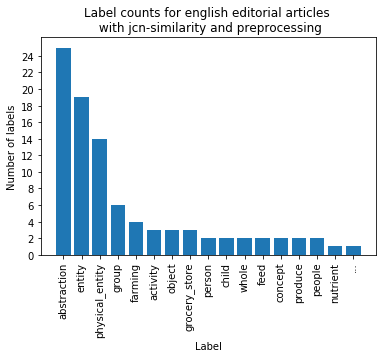

In [32]:
lc.plot_label_counts(combined_dfwb, "labels","jcnsim",lc.wordcount,"english editorial articles \n with jcn-similarity and preprocessing", sort=True,cut_ones = True)

In [33]:
wb = Wordnet()
labelswb = wb.get_topic_labels(topics,"lin_similarity")

labels_p_wb = wb.get_topic_labels(new_topics,"lin_similarity")

combined_dfwb = e.combine_topic_and_labels(topics_df, labelswb)
combined_dfwb['preprocessed_labels'] = labels_p_wb
display(combined_dfwb)

,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[whole],[mercantile_establishment]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[Department_of_Agriculture],[social_group]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[group],[communication]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[matter],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[indefinite_quantity],[relation]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[condition],[condition]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[attribute],[quality]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[whole],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[unit],[administrative_unit]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[act],[ad]


In [34]:
l = lc.wordcount(combined_dfwb,"labels")
pre_l = lc.wordcount(combined_dfwb,"preprocessed_labels")

In [35]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('physical_entity', 1), ('object', 8), ('whole', 6), ('matter', 9), ('abstraction', 11)]
[('physical_entity', 1), ('object', 3), ('whole', 5), ('matter', 3), ('abstraction', 5)]


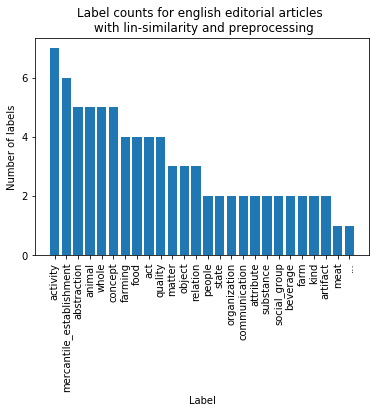

In [36]:
lc.plot_label_counts(combined_dfwb, "preprocessed_labels","linsim_pre",lc.wordcount,"english editorial articles \n with lin-similarity and preprocessing", sort=True,cut_ones = True)

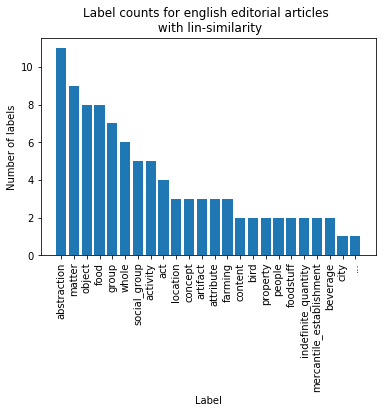

In [37]:
lc.plot_label_counts(combined_dfwb, "labels","linsim",lc.wordcount,"english editorial articles \n with lin-similarity", sort=True,cut_ones = True)

### Lowest common Hypernym with Wordembeddings

In [38]:
labelspl = pl(topics)

labels_p_pl = (pl(new_topics))

combined_dfpl = e.combine_topic_and_labels(topics_df, labelspl)
combined_dfpl['preprocessed_labels'] = labels_p_pl
display(combined_dfpl)


,0,1,2,3,4,5,6,7,8,9,labels,preprocessed_labels
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,[organization],[organization]
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,[idea],[object]
Topic 2,book,people,life,come,community,generation,movement,new,know,write,[psychological_feature],[entity]
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,[bacteria],[food]
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,[whole],[abstraction]
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,[condom],[bacteria]
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,[event],[event]
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,[structure],[structure]
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,[object],[entity]
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,[ad],[ad]


In [39]:
l = lc.wordcount(combined_dfpl,"labels")
pre_l = lc.wordcount(combined_dfpl,"preprocessed_labels")

In [40]:
print(lc.selected_words(l,search_dict))
print(lc.selected_words(pre_l,search_dict))

[('entity', 1), ('physical_entity', 1), ('object', 3), ('whole', 6), ('matter', 4), ('abstraction', 3)]
[('entity', 7), ('physical_entity', 7), ('object', 4), ('whole', 7), ('matter', 3), ('abstraction', 19)]


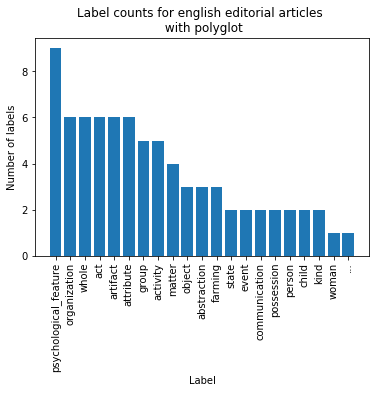

In [42]:
lc.plot_label_counts(combined_dfpl, "labels","polygl",lc.wordcount,"english editorial articles \n with polyglot", sort=True,cut_ones = True)

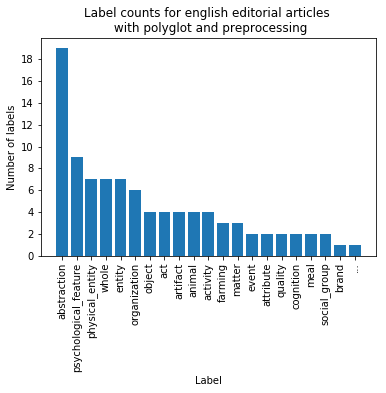

In [43]:
lc.plot_label_counts(combined_dfpl, "preprocessed_labels","polygl_pre",lc.wordcount,"english editorial articles \n with polyglot and preprocessing", sort=True,cut_ones = True)